<a href="https://colab.research.google.com/github/Anurag928/Data-Analysis-Projects/blob/main/Netflix_User_Behavior_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('/content/netflix_titles.csv')
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df = df.dropna(subset=['type', 'listed_in', 'rating', 'duration'])
df['genre'] = df['listed_in'].apply(lambda x: x.split(',')[0].strip())


<ipython-input-2-1490074890>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genre'] = df['listed_in'].apply(lambda x: x.split(',')[0].strip())


<ipython-input-3-3250852600>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


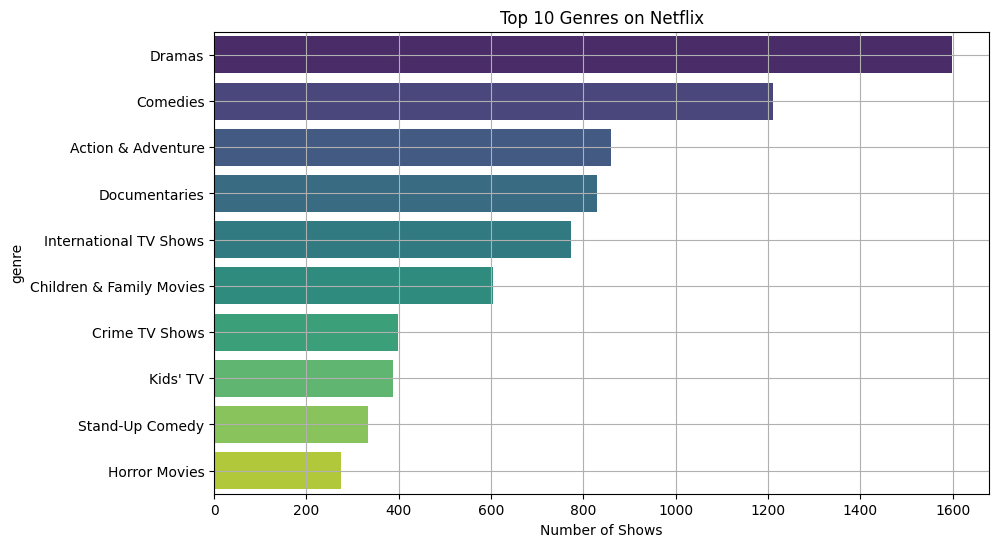

In [ ]:
genre_counts = df['genre'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Shows")
plt.grid(True)
plt.show()


In [ ]:
np.random.seed(42)
users = ['User_'+str(i) for i in range(1, 101)]
df_users = pd.DataFrame({
    'user_id': np.random.choice(users, size=1000),
    'show_title': np.random.choice(df['title'], size=1000),
    'watch_hours': np.random.exponential(scale=2.5, size=1000).round(1)  # simulate watch time
})
df_users = df_users.merge(df[['title', 'genre']], left_on='show_title', right_on='title', how='left')
df_users.drop('title', axis=1, inplace=True)


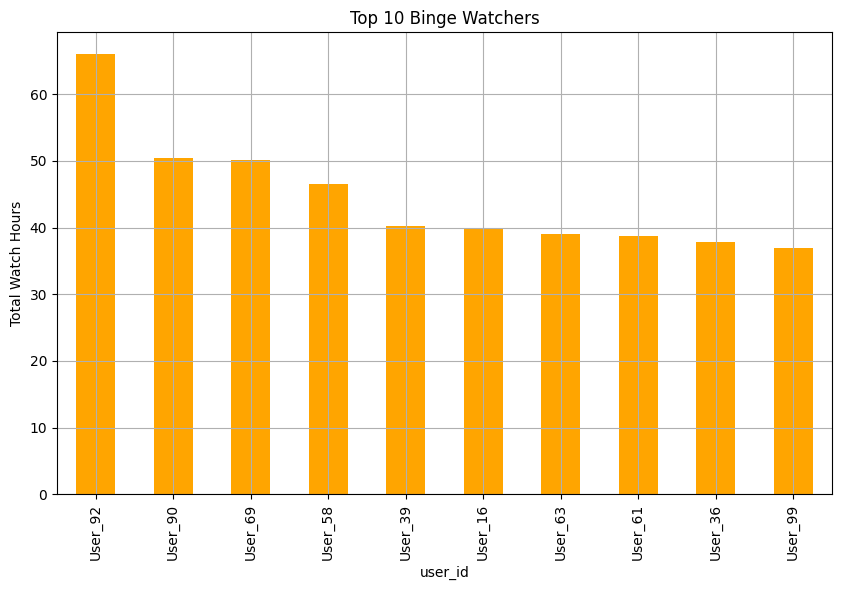

In [ ]:
top_users = df_users.groupby('user_id')['watch_hours'].sum().sort_values(ascending=False).head(10)
top_users.plot(kind='bar', figsize=(10,6), color='orange')
plt.title("Top 10 Binge Watchers")
plt.ylabel("Total Watch Hours")
plt.grid(True)
plt.show()


<ipython-input-6-658151681>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_watch.values, y=genre_watch.index, palette='rocket')


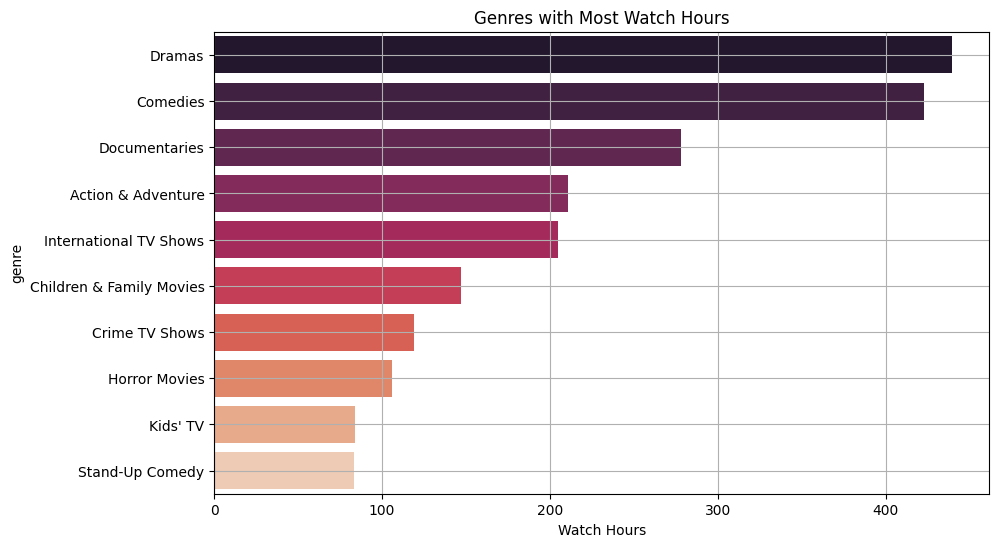

In [ ]:
genre_watch = df_users.groupby('genre')['watch_hours'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=genre_watch.values, y=genre_watch.index, palette='rocket')
plt.title("Genres with Most Watch Hours")
plt.xlabel("Watch Hours")
plt.grid(True)
plt.show()


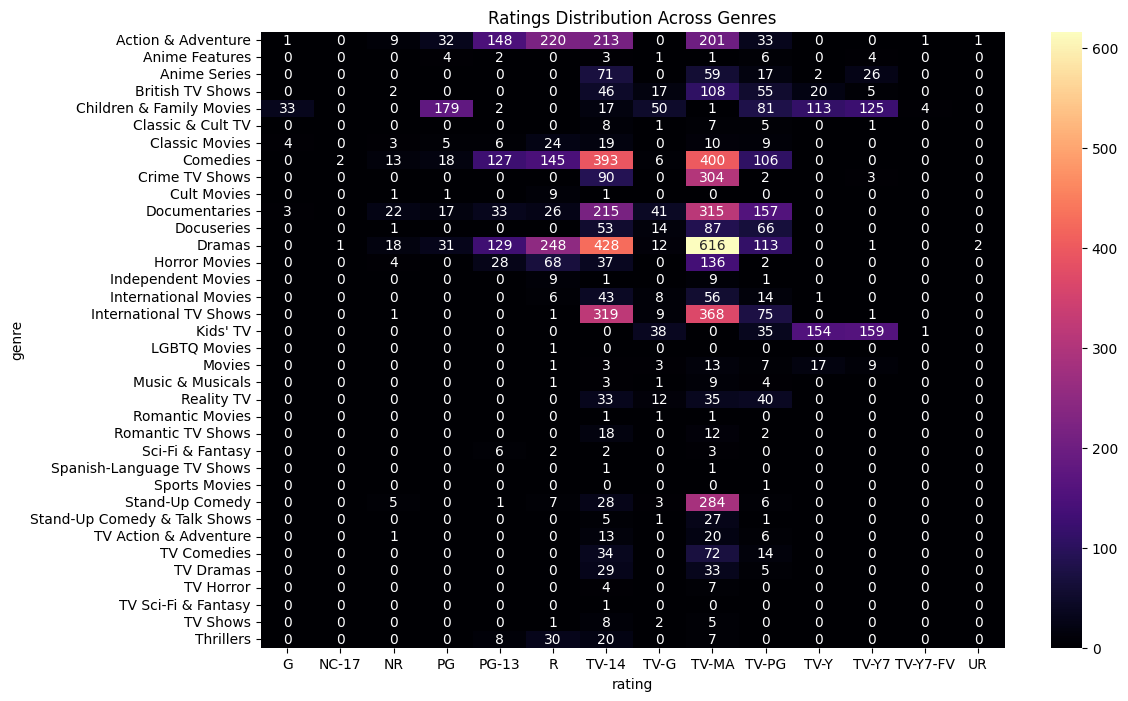

In [ ]:
df_ratings = df[['genre', 'rating']].dropna()
rating_counts = df_ratings.groupby(['genre', 'rating']).size().unstack().fillna(0)
plt.figure(figsize=(12,8))
sns.heatmap(rating_counts, annot=True, fmt='.0f', cmap='magma')
plt.title("Ratings Distribution Across Genres")
plt.show()
